In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
train =pd.read_csv("D:\mnist\mnist_train.csv")
test=pd.read_csv("D:\mnist\mnist_test.csv")

In [4]:
train.shape

(60000, 785)

In [5]:
train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [6]:
train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_Y=train.iloc[:,0]
train_X=train.drop(['label'],axis=1)

test_Y=test.iloc[:,0]
test_X=test.drop(['label'],axis=1)

In [8]:
train_X.shape

(60000, 784)

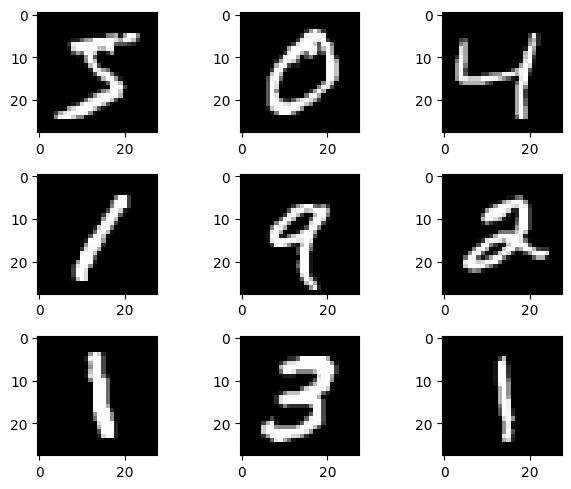

In [9]:
plt.rcParams["figure.figsize"] = [7,5]
plt.rcParams["figure.autolayout"] = True
for i in range (9):
    plt.subplot(3,3,i+1)
    digit = train_X.iloc[i, 0:]
    digit = digit.values.reshape(28,28)
    plt.imshow(digit, cmap='gray')
    

In [10]:
for i in range (9):
    print(train_Y[i])

5
0
4
1
9
2
1
3
1


In [11]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_X.iloc[0].dtype

dtype('int64')

<AxesSubplot: ylabel='count'>

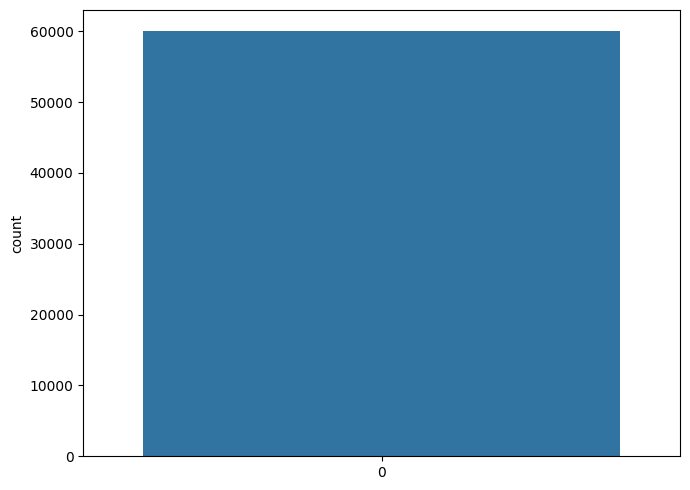

In [13]:
#displating the count of values
import seaborn as sns
sns.countplot(train_Y)


In [14]:
train_X_2d = train_X.values.reshape(-1, 28, 28)

In [15]:
#displaying digit from train_X

def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem #size of each pixel(text) * no. of pixels
    
    fig = plt.figure(figsize=(8,8))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000' 
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)#x,y,text
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c,c,c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()
    
#max_Ax-jdx* font size is done because in matplotlib the bottom left corner is set as 0

3


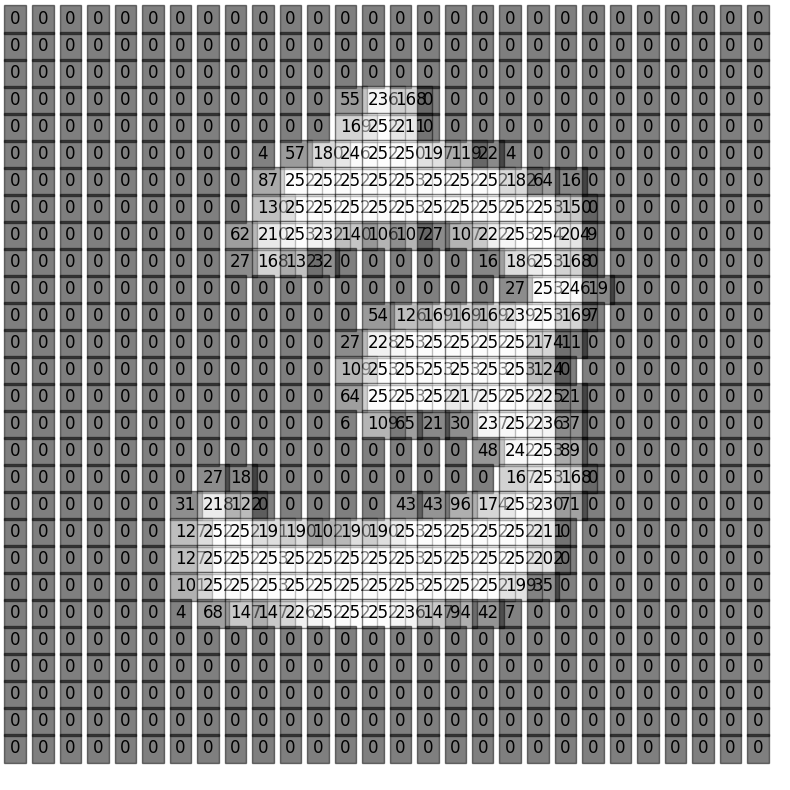

In [16]:
import random
rand_number = random.randint(0, len(train_Y))
print(train_Y[rand_number])
plot_digit(train_X_2d[rand_number])

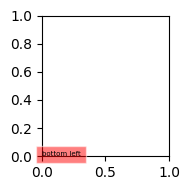

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2,2))
t = plt.text(0, 0, "bottom left",fontsize=5)
plt.setp(t, bbox={"facecolor": "red", "edgecolor": "white", "alpha": 0.5})

plt.show()

In [18]:
# Data Normalization [0, 1]
train_X = train_X /255
test_X = test_X / 255


In [19]:
# one-hot encoding for target column
from tensorflow.keras.utils import to_categorical
train_Y_cat = to_categorical(train_Y)
print(train_Y[2])
print(train_Y_cat[2])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(train_X,train_Y,train_size=0.85,random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((51000, 784), (9000, 784), (51000,), (9000,))

In [99]:
#with no hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax') #softmax coz multiclass -> input-> 1d array
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(X1_train,y1_train,epochs=5) #cei-< optimizer

Epoch 1/5
1594/1594 [==============================] - 2s 1ms/step - loss: 0.5009 - accuracy: 0.8687
Epoch 2/5
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.9126
Epoch 3/5
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2887 - accuracy: 0.9194
Epoch 4/5
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.9225
Epoch 5/5
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9256


In [100]:
score=model.evaluate(X1_test,y1_test)

282/282 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9224


In [24]:
print(type(score))
print(len(score))
score

<class 'list'>
2


[0.2738827168941498, 0.9234444499015808]

In [25]:
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 27.388271689414978%
Test score: 92.34444499015808%
MLP Error: 7.66%


In [101]:
model2 = keras.Sequential([
    keras.layers.Dense(512, input_shape=(784,), activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #softmax coz multiclass -> input-> 1d array
])


model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 12s 7ms/step - loss: 0.2103 - accuracy: 0.9357
Epoch 2/5
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0952 - accuracy: 0.9710
Epoch 3/5
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 4/5
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0503 - accuracy: 0.9838
Epoch 5/5
1594/1594 [==============================] - 11s 7ms/step - loss: 0.0409 - accuracy: 0.9873


In [102]:
score=model2.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9790


In [61]:
#this shows the model might overfight coz of more hidden layers


(9000, 784)

In [32]:
model3 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #softmax coz multiclass -> input-> 1d array
])


model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model3.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 15s 9ms/step - loss: 0.2068 - accuracy: 0.9397
Epoch 2/5
1594/1594 [==============================] - 13s 8ms/step - loss: 0.0879 - accuracy: 0.9727
Epoch 3/5
1594/1594 [==============================] - 14s 9ms/step - loss: 0.0589 - accuracy: 0.9817
Epoch 4/5
1594/1594 [==============================] - 14s 9ms/step - loss: 0.0428 - accuracy: 0.9855
Epoch 5/5
1594/1594 [==============================] - 15s 9ms/step - loss: 0.0349 - accuracy: 0.9887


In [103]:
score=model3.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9730


In [104]:
model4 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #softmax coz multiclass -> input-> 1d array
])


model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model4.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2259 - accuracy: 0.9349
Epoch 2/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0946 - accuracy: 0.9718
Epoch 3/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0617 - accuracy: 0.9809
Epoch 4/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0432 - accuracy: 0.9863
Epoch 5/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0313 - accuracy: 0.9902


In [105]:
score=model4.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9793


In [ ]:
#considering model3

In [106]:
y_predict=model3.predict(X1_test)

282/282 [==============================] - 1s 2ms/step


In [37]:
y_predict[1]

array([1.1810006e-09, 3.6519265e-05, 2.7273802e-04, 1.0000000e+00,
       4.5042152e-09, 9.9785918e-01, 1.3091158e-15, 2.3044633e-02,
       8.0219203e-01, 9.9964070e-01], dtype=float32)

In [38]:
np.argmax(y_predict[1])

3

In [39]:
y1_test.iloc[1]

3

In [40]:
arr=[np.argmax(i) for i in y_predict]
arr[:10]

[7, 3, 8, 9, 3, 9, 7, 7, 5, 4]

In [41]:
y1_test[:10]

12628    7
37730    3
39991    8
8525     9
8279     3
51012    9
14871    7
15127    7
9366     5
33322    4
Name: label, dtype: int64

In [42]:
X1_train.shape[0]

51000

In [26]:
xCon_train = X1_train.values.reshape(X1_train.shape[0], 28, 28, 1)
xCon_test = X1_test.values.reshape(X1_test.shape[0], 28, 28, 1)

# Define the model architecture
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model5.fit(xCon_train, y1_train, epochs=5)

Epoch 1/5
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1588 - accuracy: 0.9534
Epoch 2/5
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0552 - accuracy: 0.9834
Epoch 3/5
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 4/5
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 5/5
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0165 - accuracy: 0.9946


In [44]:
xCon_test= X1_test.values.reshape(X1_test.shape[0], 28, 28, 1)
score=model5.evaluate(xCon_test,y1_test)


282/282 [==============================] - 3s 9ms/step - loss: 0.0473 - accuracy: 0.9869


In [94]:
x=pd.read_csv('D:/mnist/pixel_data.csv',index_col=False)
x=x.T

In [95]:
x=x/255

In [117]:
y_predict=model.predict(x)

1/1 [==============================] - 0s 43ms/step


In [118]:
y_predict

array([[1.0652111e-11, 1.8875015e-18, 1.8300120e-03, 8.9940977e-01,
        3.6195658e-18, 9.8754793e-02, 2.9191970e-06, 2.5715381e-06,
        4.3960833e-12, 3.3972189e-19]], dtype=float32)

In [119]:
np.argmax(y_predict)

3

In [44]:
t=train_Y.value_counts().index
t

Int64Index([1, 7, 3, 2, 9, 0, 6, 8, 4, 5], dtype='int64')